<a href="https://colab.research.google.com/github/cakshay2013/Convex-Optimization-Problems-and-Solutions/blob/main/Polynomial_Approximation_Problem_Solution_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal polynomial coefficients a1: [ 0.018  -0.1825 -0.072   0.98    0.    ]
Optimum cost function value c1: 0.6277800000062301
Optimal polynomial coefficients a2: [-0.00627968 -0.01247122  0.07459316  0.07868951 -0.12856083 -0.0956841
 -0.58539364  0.00493601  1.62146539  0.01311829]
Optimum cost function value c2: 0.04417411513961348
Optimal polynomial coefficients a3: [-1.99620058e-08 -6.64213910e-08  8.18326082e-06  1.77273520e-05
 -5.39794074e-04 -4.52398069e-04  1.20097221e-02  4.67065758e-03
 -1.71136961e+00 -2.48354487e-02  7.30912472e-01  7.36724462e-02
 -2.47204901e+00 -1.22543470e-01  5.00194913e+00  1.06373708e-01
 -5.93056779e+00 -3.73541402e-02  3.78441280e+00  1.58478293e+00]
Optimum cost function value c3: 1.9614235432829888e-07


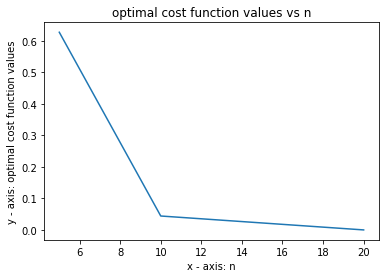

In [5]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import cvxpy as cp
N=10
 
#least squares objective fcn
n1=5

a1 = cp.Variable(n1)
x = np.zeros(2*N+1)
x[0] = -1
for i in range(0, 2*N-1):
  x[i+1] = x[i] + 1/N

X1 = np.zeros([n1,2*N+1])
for i in range(0, n1-1):
  for j in range(0, 2*N):
    X1[i,j] = np.power(x[j], i)

# Objective fcn
#c1=cp.square(cp.norm((np.power(x, n1))- a1@X1))
c1=cp.norm((np.power(x, n1))- a1@X1,1)
objective = cp.Minimize(c1)
 
#Constraints
constraints = []
prob = cp.Problem(objective, constraints)
prob.solve()
 
#Answers
#print("x:", x)
#print("X1:", X1)
print("Optimal polynomial coefficients a1:", a1.value)
print("Optimum cost function value c1:",c1.value)
 
n2=10

a2 = cp.Variable(n2)
X2 = np.empty([n2,2*N+1])
for i in range(0, n2-1):
  for j in range(0, 2*N):
    X2[i,j] = np.power(x[j], i)
 
#Objective fcn
#c2=cp.square(cp.norm((np.power(x, n2))- a2@X2))
c2=cp.norm((np.power(x, n2))- a2@X2,1)
objective = cp.Minimize(c2)
 
#Constraints
constraints = []
prob = cp.Problem(objective, constraints)
prob.solve()
 
#Answers
#print("X2:", X2)
print("Optimal polynomial coefficients a2:", a2.value)
print("Optimum cost function value c2:",c2.value)
 
n3=20

a3 = cp.Variable(n3)
X3 = np.empty([n3,2*N+1])
for i in range(0, n3-1):
  for j in range(0, 2*N):
    X3[i,j] = np.power(x[j], i)
 
#Objective fcn
#c3=cp.square(cp.norm((np.power(x, n3))- a3@X3))
c3=cp.norm((np.power(x, n3))- a3@X3,1)
objective = cp.Minimize(c3)
 
#Constraints
constraints = []
prob = cp.Problem(objective, constraints)
prob.solve()
 
#Answers
#print("X3:", X3)
print("Optimal polynomial coefficients a3:", a3.value)
print("Optimum cost function value c3:",c3.value)
 
n = [n1,n2,n3]
c = [c1.value,c2.value,c3.value]
#c = np.reshape(c, (3,1))

plt.plot(n,c)
plt.xlabel('x - axis: n') 
plt.ylabel('y - axis: optimal cost function values') 
plt.title('optimal cost function values vs n') 
plt.show()